In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from intelligent_placer_lib import loading
from intelligent_placer_lib import intelligent_placer
from intelligent_placer_lib.recognizing import get_polygon_contour, get_things_contours
import cv2
import pandas as pd


Зададим директорию, откуда возьмём тестовые данные и загрузим их

In [2]:
test_images_path = 'images/input/'
test_images = loading.load_images_from_folder(test_images_path)

Посмотрим, нормально ли загрузились изображения

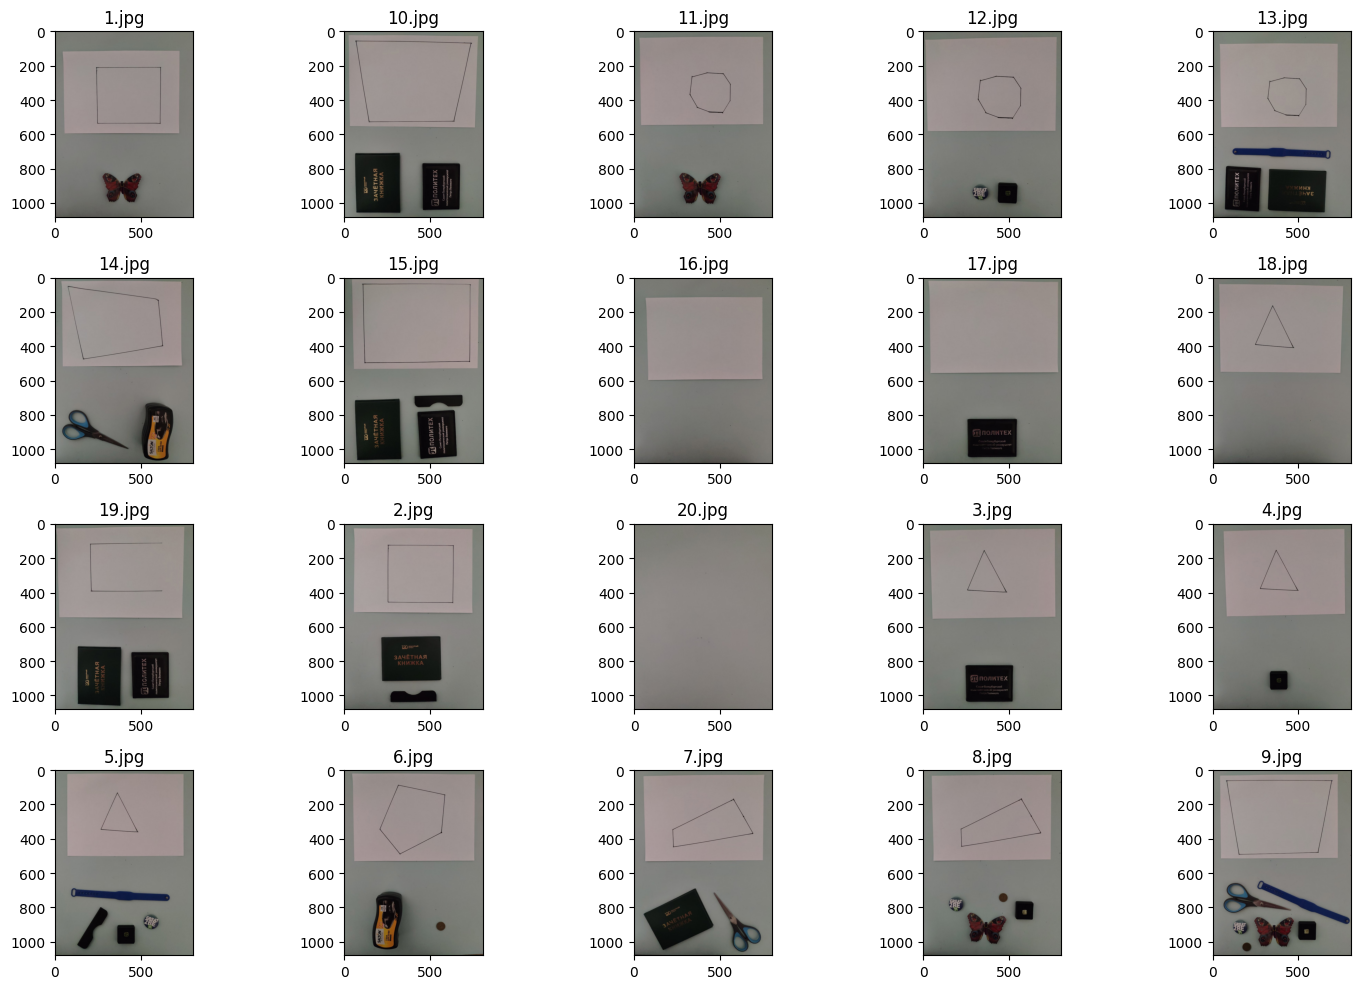

In [3]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    ax[i // 5, i % 5].set_title(im_name)
    ax[i // 5, i % 5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
fig.tight_layout()


Как видим, всё хорошо(вроде бы?).
Делим изображение на две части, в одной из которых будут предметы, а в другой многоугольник

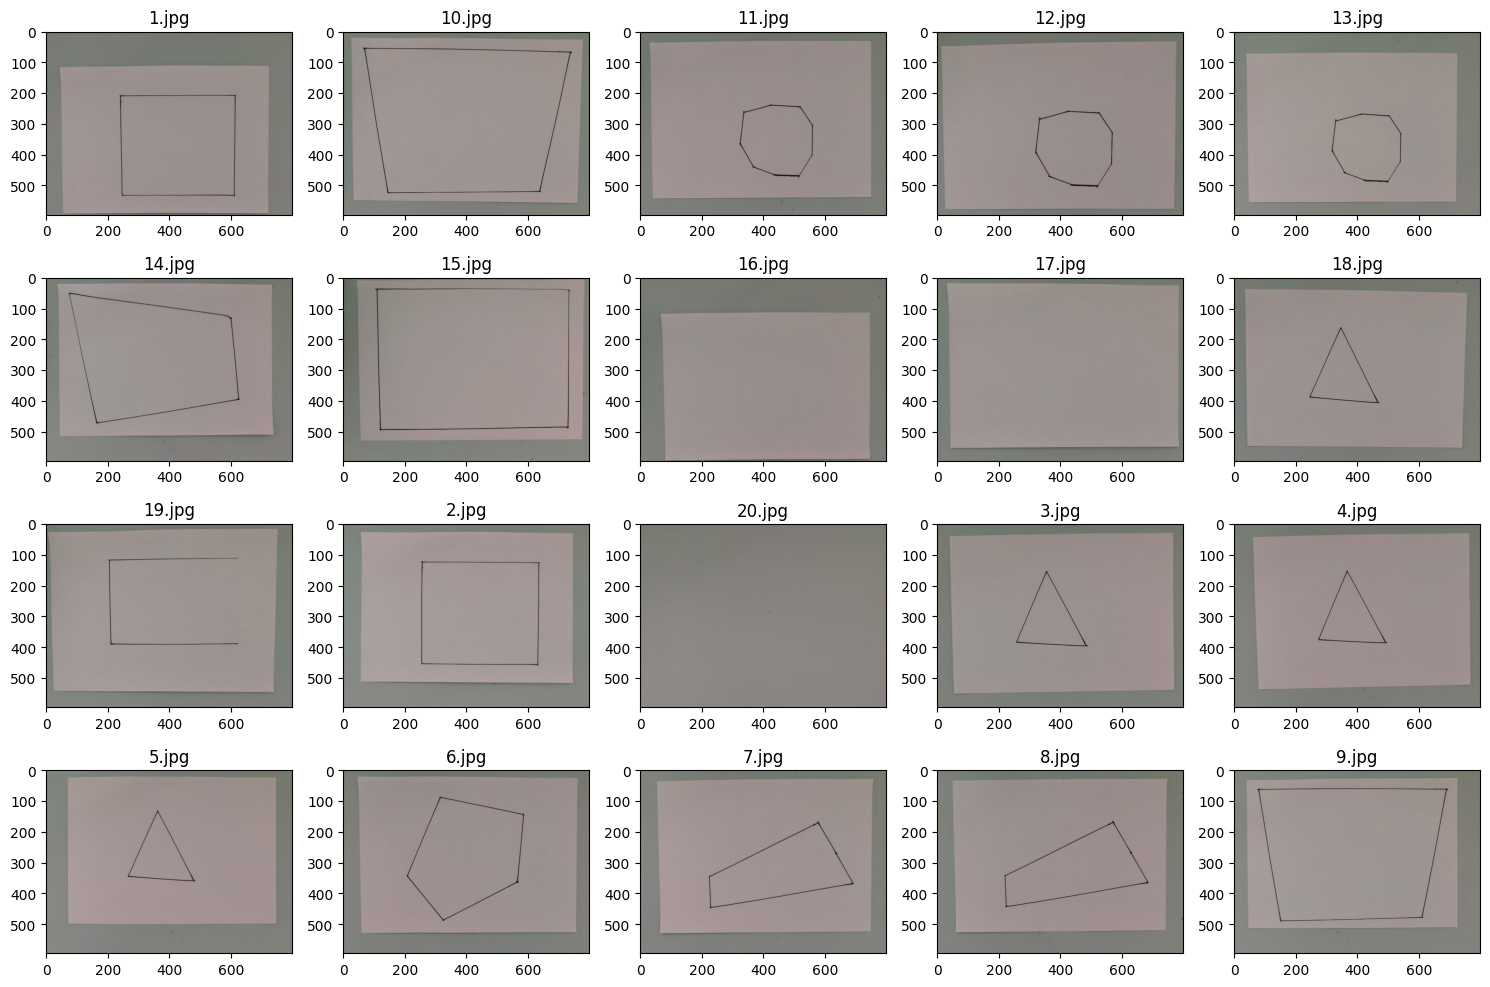

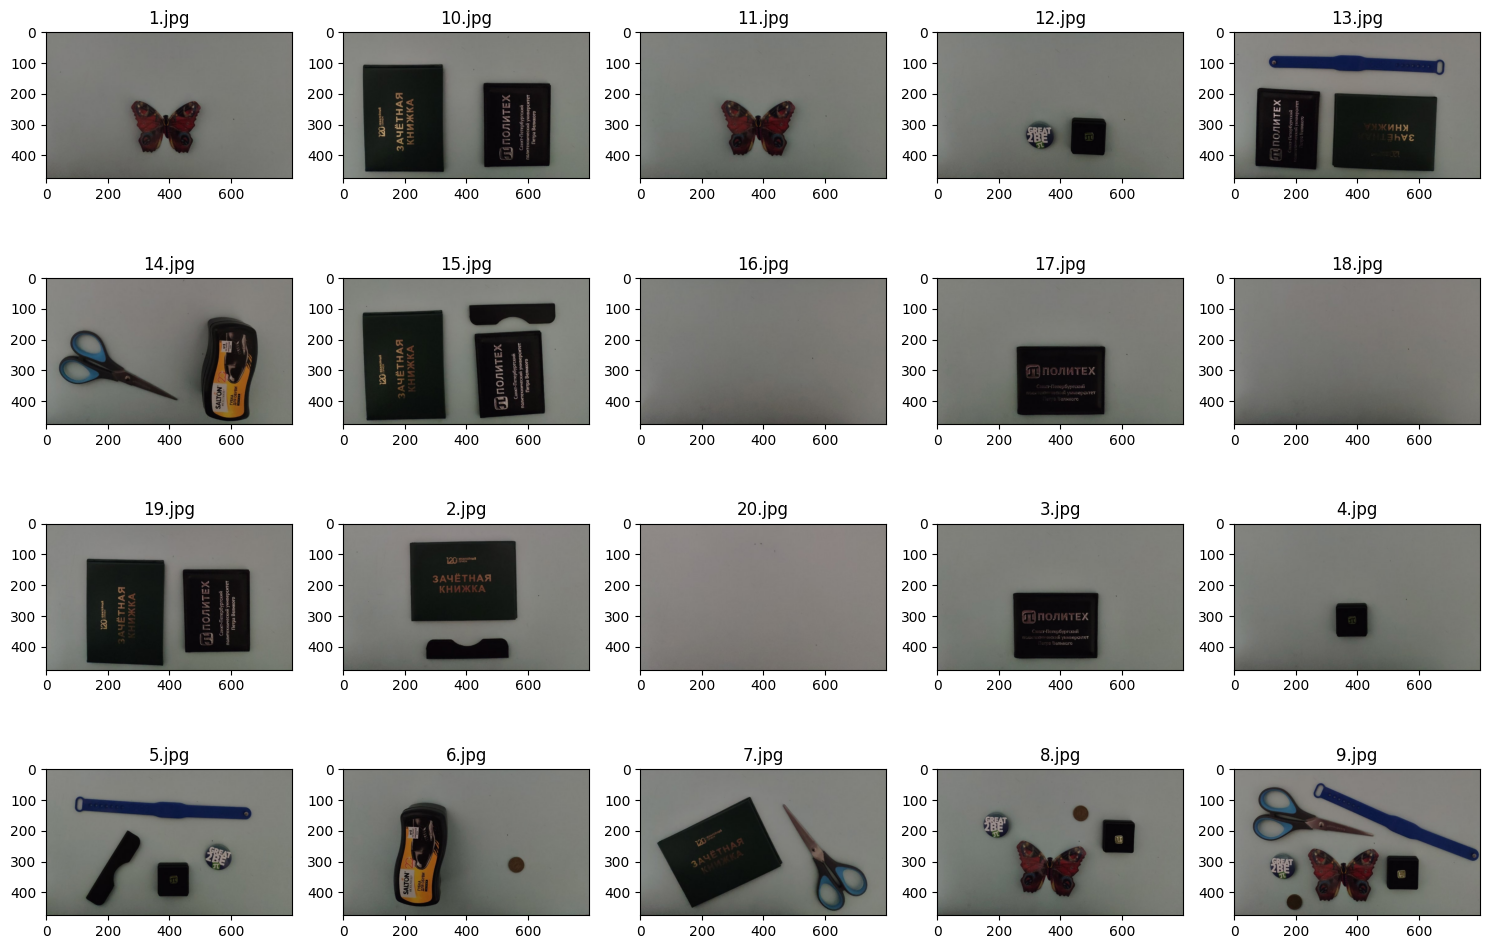

In [5]:
min_height, max_height = 5, 600
min_width, max_width = 0, 800
fig1, ax1 = plt.subplots(4, 5, figsize=(15, 10))
fig2, ax2 = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    polygon_image = image[min_height:max_height, min_width:max_width]
    things_image = image[max_height:image.shape[0] - 5, min_width:max_width]

    ax1[i // 5, i % 5].set_title(im_name)
    ax1[i // 5, i % 5].imshow(cv2.cvtColor(polygon_image, cv2.COLOR_BGR2RGB))

    ax2[i // 5, i % 5].set_title(im_name)
    ax2[i // 5, i % 5].imshow(cv2.cvtColor(things_image, cv2.COLOR_BGR2RGB))
fig1.tight_layout()
fig2.tight_layout()

Следующий шаг в программе(на данный момент) - это предобработка и выделение контуров. Используются фильтры Кэнни, морфологические операции и другое, что можно увидеть в модулях 'preprocessing' и 'recognizing'. Вывод контуров показан ниже

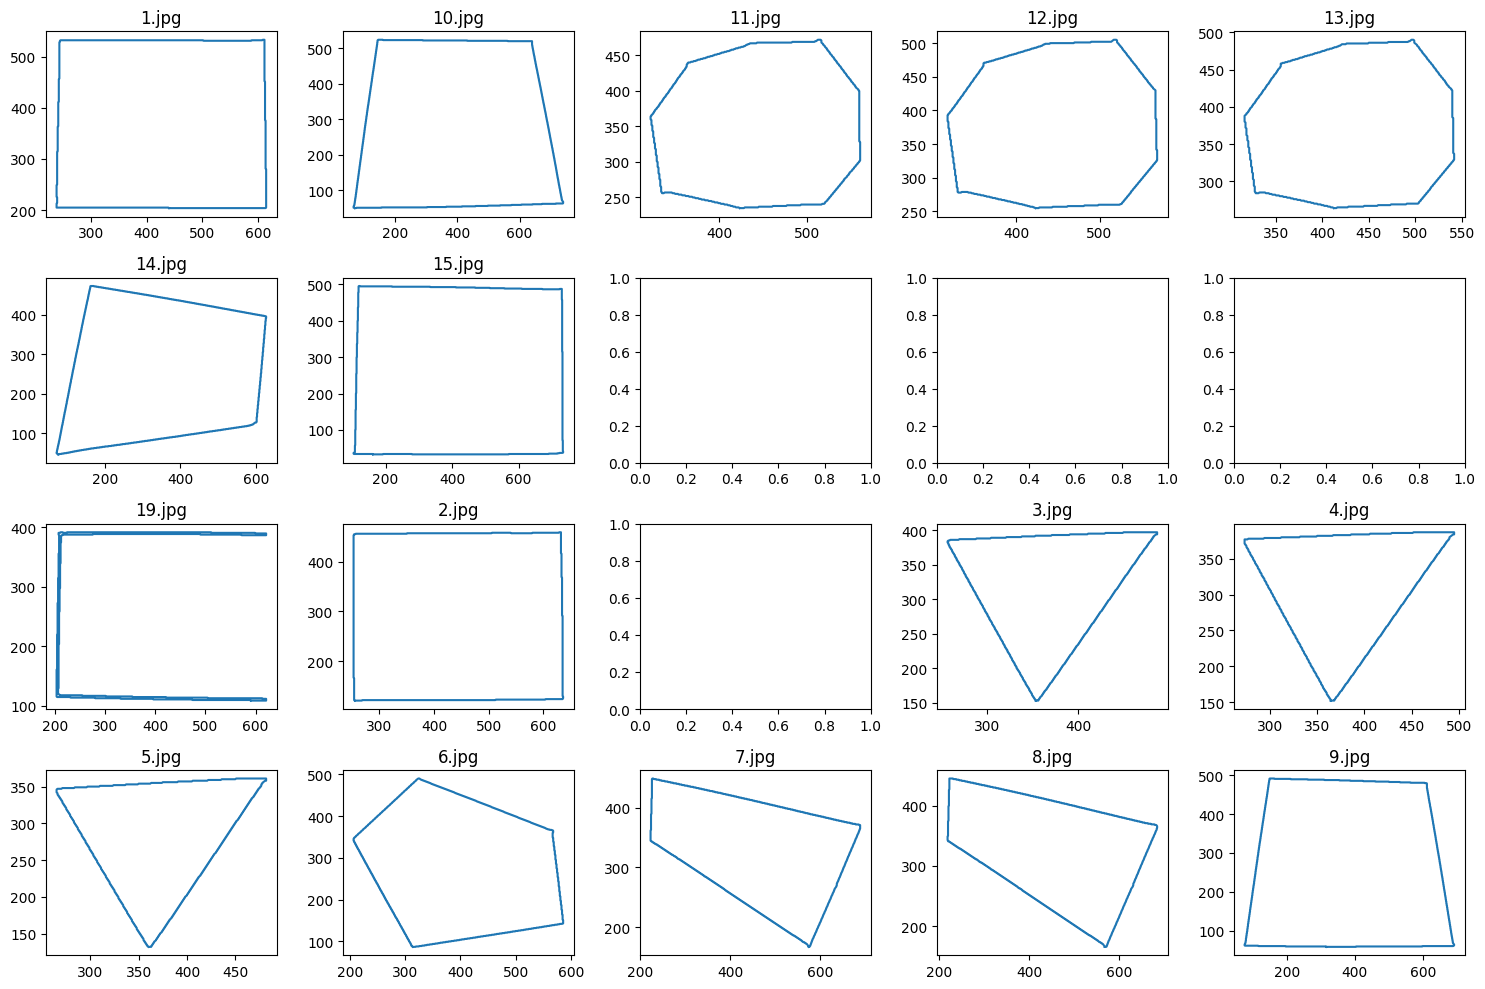

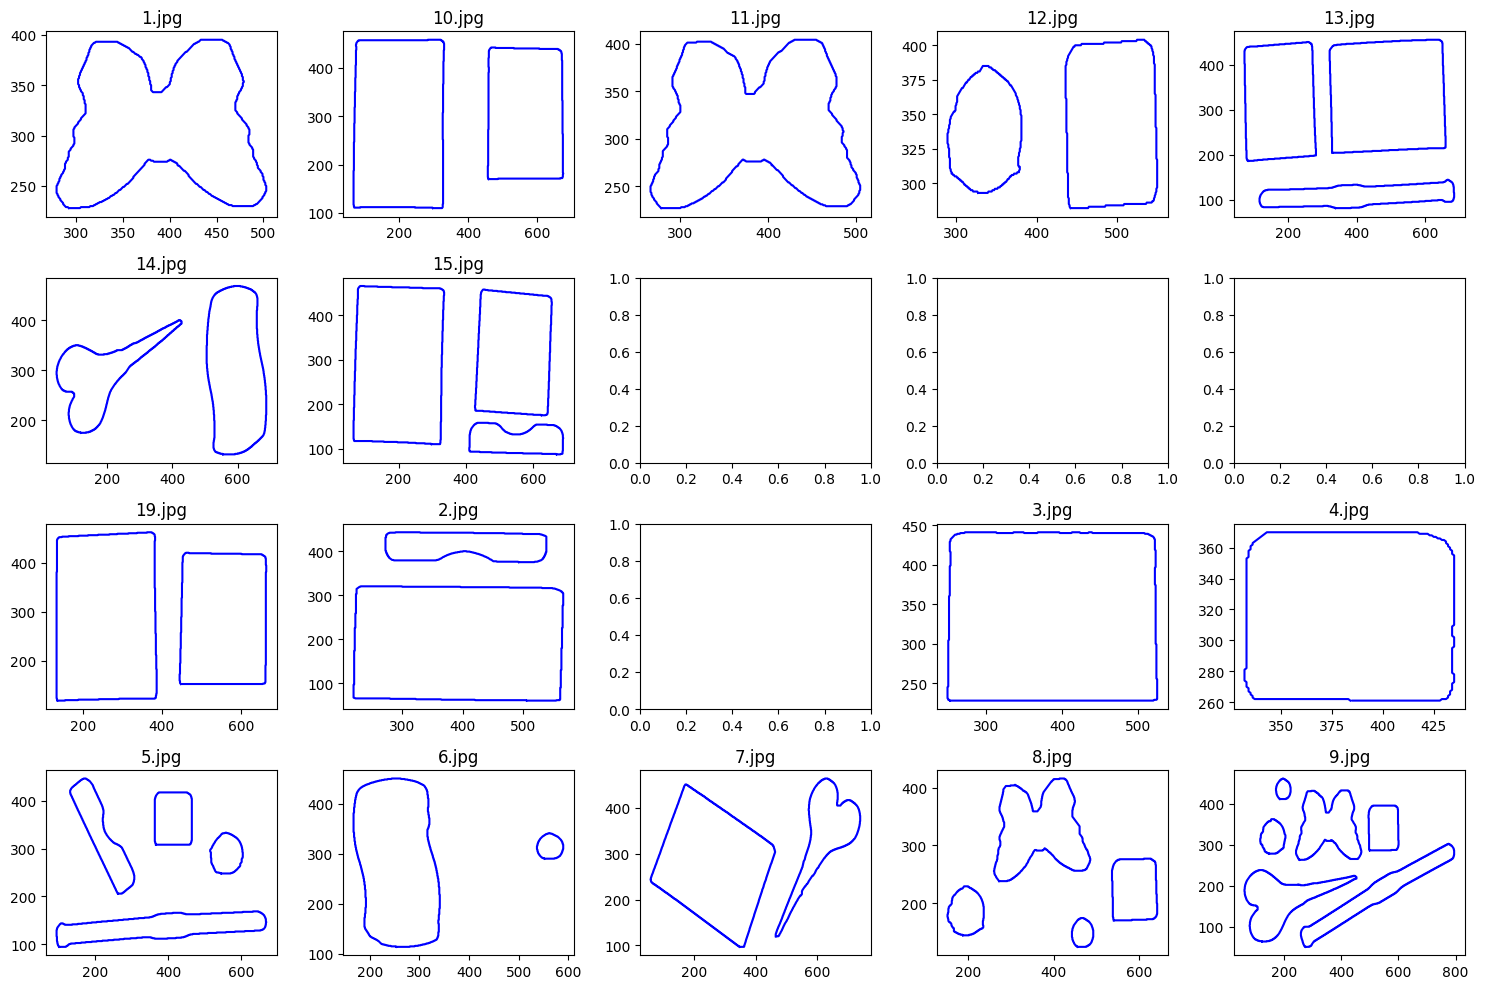

In [7]:
fig3, ax3 = plt.subplots(4, 5, figsize=(15, 10))
fig4, ax4 = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    polygon_image = image[min_height:max_height, min_width:max_width]
    things_image = image[max_height:image.shape[0] - 5, min_width:max_width]
    polygon_contour = get_polygon_contour(polygon_image)
    things_contours = get_things_contours(things_image)
    # Если вершины не нашлись, то пропускаем итерацию
    if len(polygon_contour) == 0 or len(things_contours) == 0:
        continue


    ax3[i // 5, i % 5].set_title(im_name)
    x = polygon_contour[:, 0][:, 0]
    y = polygon_contour[:, 0][:, 1]
    ax3[i // 5, i % 5].plot(x,y)

    ax4[i // 5, i % 5].set_title(im_name)
    for contour in things_contours:
        x = contour[:, 0][:, 0]
        y = contour[:, 0][:, 1]
        ax4[i // 5, i % 5].plot(x, y, color='blue')
fig3.tight_layout()
fig4.tight_layout()

Теперь, когда есть контуры предметов и многоугольника, можно попробовать что-нибудь 'предсказать'. Пример реализации очень мощного алгоритма, детали которого в плане умышленно опущены, находится в модуле 'algorithm'(ни в коем случае не смотрите).
Запустим все вышеописанные шаги вместе(дополнительно подгрузим результаты, которые должны быть):

In [53]:
df = pd.read_csv('images/input/ExpectedResultsWithDescr.csv', delimiter=',', encoding="windows-1251")
correct_cnt = 0
for i, (image, im_name) in enumerate(test_images):
    expected_result = df.query(f'Name == \'{im_name}\'').iloc[0]['ExpectedResult']
    result = intelligent_placer.check_image(test_images_path + im_name)
    correct_cnt += (result == expected_result)
    print(f'{im_name}: Результат = {result}, Ожидаемый результат = {bool(expected_result)}')
print(f'Правильных: {correct_cnt}\nВсего тестов: {len(test_images)}\nПроцент правильных ответов: {correct_cnt / len(test_images) * 100}%')

1.jpg: Результат = False, Ожидаемый результат = True
10.jpg: Результат = True, Ожидаемый результат = True
11.jpg: Результат = False, Ожидаемый результат = False
12.jpg: Результат = True, Ожидаемый результат = True
13.jpg: Результат = False, Ожидаемый результат = False
14.jpg: Результат = True, Ожидаемый результат = True
15.jpg: Результат = False, Ожидаемый результат = True
16.jpg: Результат = False, Ожидаемый результат = False
17.jpg: Результат = False, Ожидаемый результат = False
18.jpg: Результат = False, Ожидаемый результат = False
19.jpg: Результат = False, Ожидаемый результат = False
2.jpg: Результат = True, Ожидаемый результат = True
20.jpg: Результат = False, Ожидаемый результат = False
3.jpg: Результат = False, Ожидаемый результат = False
4.jpg: Результат = True, Ожидаемый результат = True
5.jpg: Результат = False, Ожидаемый результат = False
6.jpg: Результат = True, Ожидаемый результат = True
7.jpg: Результат = False, Ожидаемый результат = False
8.jpg: Результат = True, Ожидае